# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [1]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [2]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [3]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [4]:
# Step 2: Make the API Request


base_url = 'https://archive-api.open-meteo.com/v1/archive'

# Create a dictionary called params that holds the parameters needed for an API request to the Open-Meteo weather API. Each key in the dictionary corresponds to a parameter the API expects, such as latitude, longitude, date range, which variables to fetch (joined as a comma-separated string), and the timezone.

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

# Make the GET request to the Open-Meteo API passing the parameters defined above. The response will contain the weather data for the specified location and date range and be stored in the response object in JSON format.

response = requests.get(base_url, params=params)


In [5]:
# Check if the request was successful.
# Status_code is an attribute of the response object returned by requests.get(). It contains the HTTP status code of the response (e.g., 200 for success, 404 for not found).

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [6]:
# Step 3: Load Data into pandas DataFrame

# The response object contains the weather data for the specified parameters returned by Open-Meteo API. It is in JSON format and accessing it using response.json() gives a Python dictionary.

data = response.json()

# Extract the values associated with the 'hourly' key from the JSON dictionary returned by the API. The value of the 'hourly' key is itself a dictionary, where each key (like 'temperature_2m', 'relativehumidity_2m', 'precipitation') corresponds to a requested parameter. Each of these keys maps to a list of values (e.g., hourly temperature readings), which become the columns in the DataFrame.

hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.7,99,1.0
1,2023-01-01T01:00,10.5,99,1.0
2,2023-01-01T02:00,10.4,98,0.1
3,2023-01-01T03:00,10.3,96,0.0
4,2023-01-01T04:00,9.7,95,0.0


In [7]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 168 non-null    object 
 1   temperature_2m       168 non-null    float64
 2   relativehumidity_2m  168 non-null    int64  
 3   precipitation        168 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.4+ KB
None
       temperature_2m  relativehumidity_2m  precipitation
count      168.000000           168.000000     168.000000
mean         8.371429            86.422619       0.142857
std          3.495063            12.799933       0.436037
min          0.400000            45.000000       0.000000
25%          5.900000            81.000000       0.000000
50%          8.250000            90.500000       0.000000
75%         11.100000            97.000000       0.000000
max         17.900000           100.000000       3.100000


In [8]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [24]:
# Handle missing values (if any)
df.ffill(inplace=True)  # Forward fill


In [10]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.371429,86.422619,0.142857
std,3.495063,12.799933,0.436037
min,0.400000,45.000000,0.000000
25%,5.900000,81.000000,0.000000
50%,8.250000,90.500000,0.000000
75%,11.100000,97.000000,0.000000
max,17.900000,100.000000,3.100000


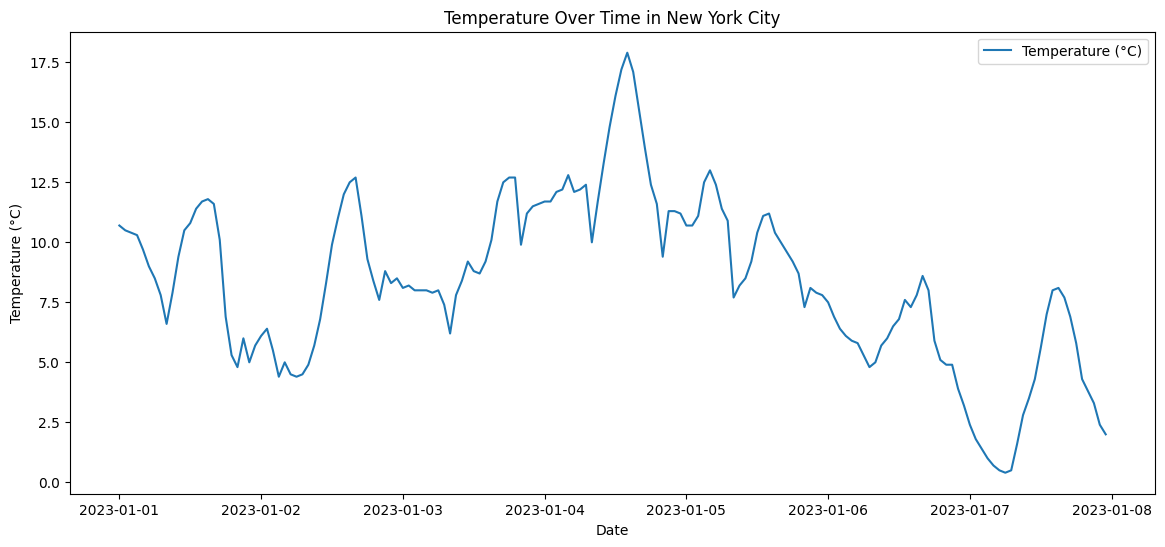

In [11]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

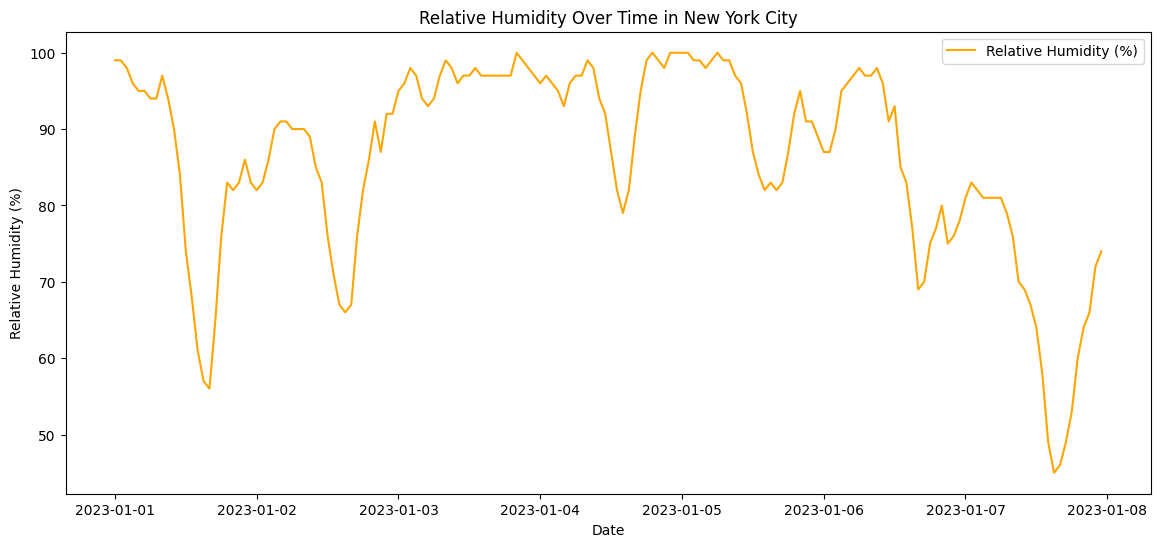

In [12]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


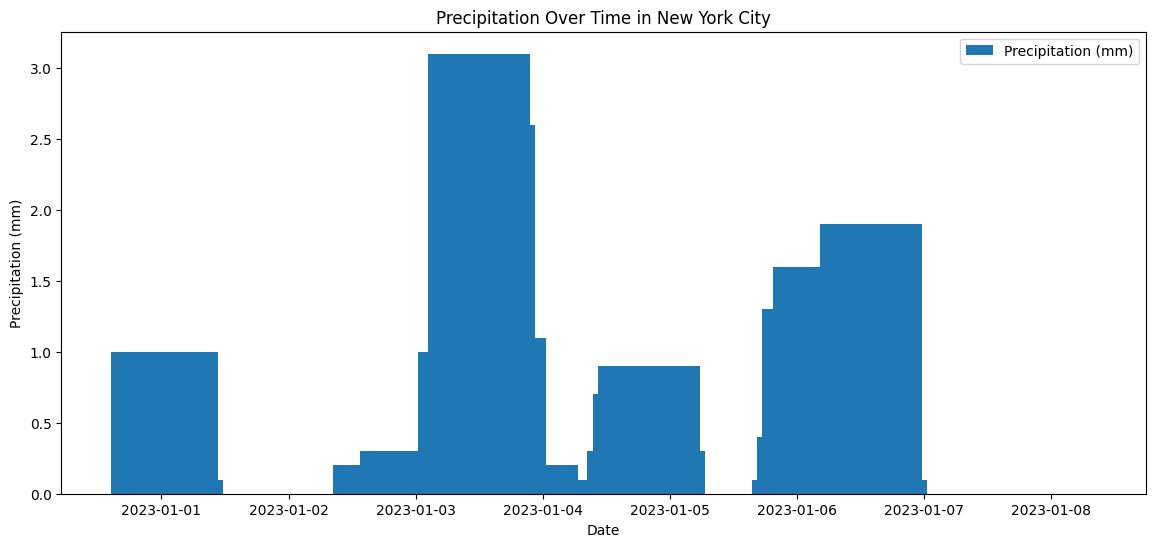

In [13]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [14]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.24


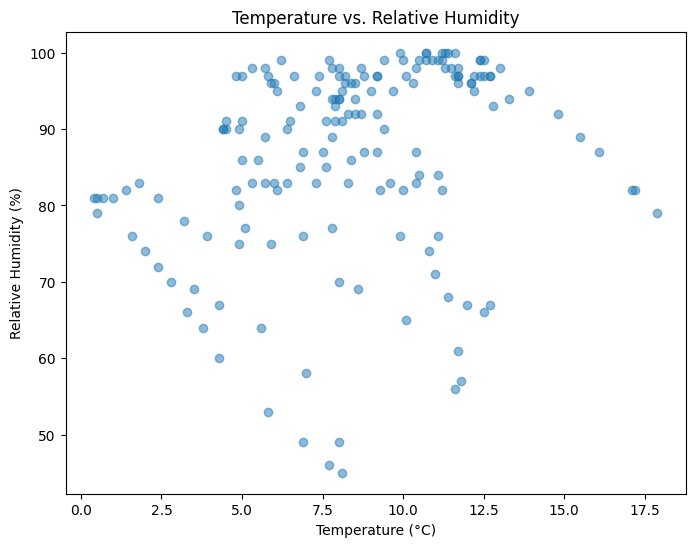

In [15]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [16]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.850000,83.708333,0.087500
2023-01-02,7.775000,83.458333,0.020833
2023-01-03,9.408333,96.875000,0.395833
2023-01-04,12.995833,94.166667,0.095833
2023-01-05,9.916667,92.666667,0.000000


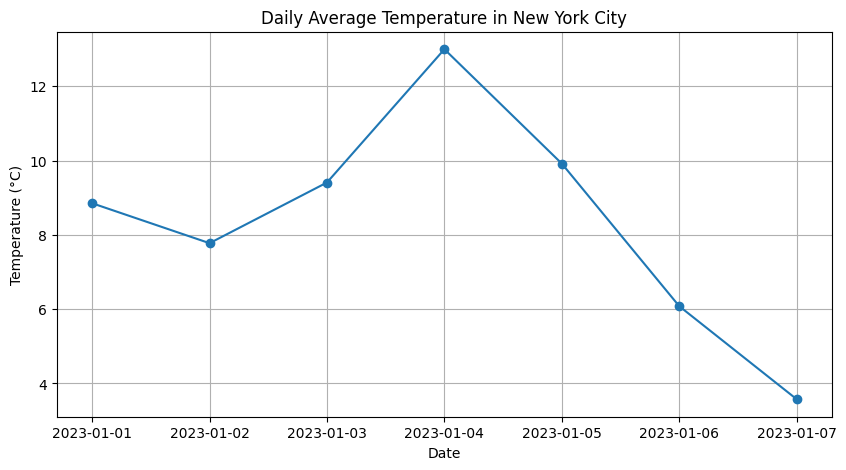

In [17]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [18]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.ffill(inplace=True)


/var/folders/xk/1_94y7fn37sf7kbch2g77hlm0000gp/T/ipykernel_96366/4259999984.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_la.fillna(method='ffill', inplace=True)


In [19]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [ ]:
# Combine DataFrames for Comparison
# This operation is effectively an "outer join" on the index (which is the date) of the two Series: daily_avg['temperature_2m'] and daily_avg_la['temperature_2m'].

# When you create a DataFrame from a dictionary of Series with different indexes, pandas aligns them by their index (date), and any dates that are present in one but not the other will have NaN for the missing value. This is the same as an outer join on the index.

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


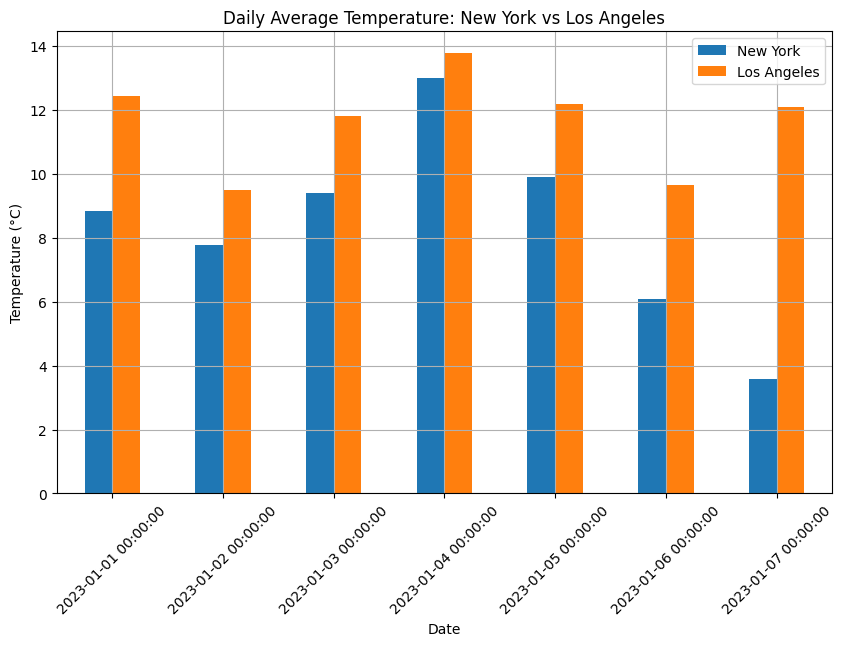

In [21]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [22]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.850000,12.433333,3.583333
2023-01-02,7.775000,9.483333,1.708333
2023-01-03,9.408333,11.808333,2.400000
2023-01-04,12.995833,13.766667,0.770833
2023-01-05,9.916667,12.183333,2.266667
2023-01-06,6.079167,9.662500,3.583333
2023-01-07,3.575000,12.095833,8.520833


In [23]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


In [ ]:
# Retrieve hourly precipitation data for London and Seattle for the year 2022.
# Set up parameters

# Coordinates for London (ldn)
latitude_ldn = 51.5074
longitude_ldn = -0.1278

# Coordinates for Seattle (sea)
latitude_sea = 47.6062
longitude_sea = -122.3321

# Date range for 2022
start_date2 = '2022-01-01'
end_date2 = '2022-12-31'  

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']



In [ ]:
# Make the API Request London (ldn)

params_ldn = {
    'latitude': latitude_ldn,
    'longitude': latitude_ldn,
    'start_date': start_date2,
    'end_date': end_date2,
    'hourly': ','.join(hourly_variables),
    'timezone': 'auto'
}

response_ldn = requests.get(base_url, params=params_ldn)

# Load and clean London data
data_ldn = response_ldn.json()
hourly_data_ldn = data_ldn['hourly']
df_ldn = pd.DataFrame(hourly_data_ldn)

df_ldn['time'] = pd.to_datetime(df_ldn['time'])
df_ldn.set_index('time', inplace=True)
df_ldn.ffill(inplace=True)


In [31]:
print(df_ldn.head())
print(df_ldn.describe())

                     temperature_2m  relativehumidity_2m  precipitation
time                                                                   
2022-01-01 00:00:00            -6.3                   92            0.0
2022-01-01 01:00:00            -5.9                   92            0.0
2022-01-01 02:00:00            -5.5                   93            0.4
2022-01-01 03:00:00            -5.2                   93            0.6
2022-01-01 04:00:00            -4.8                   93            0.7
       temperature_2m  relativehumidity_2m  precipitation
count     8760.000000          8760.000000    8760.000000
mean         7.622888            68.563927       0.062751
std         12.844838            21.835910       0.266777
min        -20.400000            13.000000       0.000000
25%         -3.300000            51.000000       0.000000
50%          7.600000            74.000000       0.000000
75%         17.900000            87.000000       0.000000
max         36.000000           

In [ ]:
# Make the API Request Seattle (sea)

params_sea = {
    'latitude': latitude_sea,
    'longitude': latitude_sea,
    'start_date': start_date2,
    'end_date': end_date2,
    'hourly': ','.join(hourly_variables),
    'timezone': 'auto'
}

response_sea = requests.get(base_url, params=params_sea)

# Load and clean Seattle data
data_sea = response_sea.json()
hourly_data_sea = data_sea['hourly']
df_sea = pd.DataFrame(hourly_data_sea)

df_sea['time'] = pd.to_datetime(df_sea['time'])
df_sea.set_index('time', inplace=True)
df_sea.ffill(inplace=True)


In [30]:
print(df_sea.head())
print(df_sea.describe())

                     temperature_2m  relativehumidity_2m  precipitation
time                                                                   
2022-01-01 00:00:00            -0.1                  100            0.0
2022-01-01 01:00:00             0.0                   99            0.0
2022-01-01 02:00:00             0.1                  100            0.0
2022-01-01 03:00:00             0.2                  100            0.0
2022-01-01 04:00:00             0.5                   99            0.0
       temperature_2m  relativehumidity_2m  precipitation
count     8760.000000          8760.000000    8760.000000
mean        11.658151            61.457877       0.044772
std         12.242465            24.568031       0.364302
min        -13.200000            10.000000       0.000000
25%          0.800000            41.000000       0.000000
50%         11.200000            63.000000       0.000000
75%         21.500000            84.000000       0.000000
max         40.500000           

In [34]:
# Resample Data to Weekly Totals

weekly_ldn = df_ldn.resample('W').agg({
    'precipitation': 'sum',
    'temperature_2m': 'mean',
    'relativehumidity_2m': 'mean'
})

weekly_sea = df_sea.resample('W').agg({
    'precipitation': 'sum',
    'temperature_2m': 'mean',
    'relativehumidity_2m': 'mean'
})

In [35]:
print(weekly_ldn.head())
print(weekly_sea.head())

            precipitation  temperature_2m  relativehumidity_2m
time                                                          
2022-01-02           12.9       -1.760417            94.395833
2022-01-09           16.6       -9.566667            86.690476
2022-01-16           10.7       -9.491071            84.892857
2022-01-23            1.8       -8.498810            87.297619
2022-01-30            9.6       -9.408929            88.654762
            precipitation  temperature_2m  relativehumidity_2m
time                                                          
2022-01-02            4.2        1.439583            96.229167
2022-01-09           11.5       -0.858333            78.732143
2022-01-16           13.5       -1.973810            87.815476
2022-01-23            8.1       -3.855952            85.886905
2022-01-30            3.4       -4.723214            89.869048


In [37]:
# Combine Precipitation Data for London and Seattle

combined_precip = pd.DataFrame({
    'London': weekly_ldn['precipitation'],
    'Seattle': weekly_sea['precipitation']
})

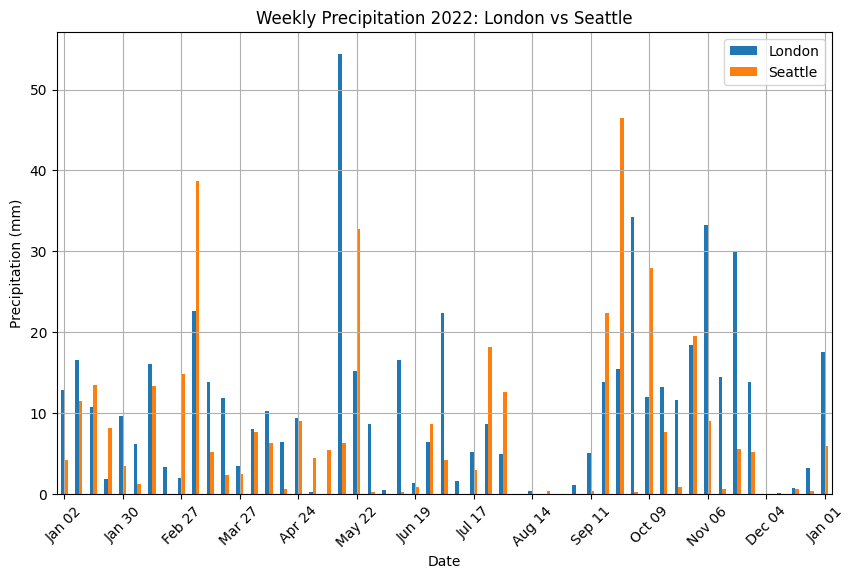

In [40]:
# Plot comparison of weekly precipitation for London and Seattle

ax = combined_precip.plot(kind='bar', figsize=(10, 6))
plt.title('Weekly Precipitation 2022: London vs Seattle')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')

# Show every 4th label and use abbreviated month and day
xticks = range(0, len(combined_precip.index), 4)
labels = combined_precip.index[::4].strftime('%b %d')
plt.xticks(ticks=xticks, labels=labels, rotation=45)

plt.grid(True)
plt.show()

In [43]:
# Calculate Precipitation Difference

# Calculate Temperature Difference
combined_precip['Precipitation Difference'] = combined_precip['London'] - combined_precip['Seattle']
print(combined_precip)


            London  Seattle  Precipitation Difference
time                                                 
2022-01-02    12.9      4.2                       8.7
2022-01-09    16.6     11.5                       5.1
2022-01-16    10.7     13.5                      -2.8
2022-01-23     1.8      8.1                      -6.3
2022-01-30     9.6      3.4                       6.2
2022-02-06     6.2      1.2                       5.0
2022-02-13    16.1     13.4                       2.7
2022-02-20     3.3      0.0                       3.3
2022-02-27     2.0     14.8                     -12.8
2022-03-06    22.6     38.7                     -16.1
2022-03-13    13.9      5.2                       8.7
2022-03-20    11.8      2.4                       9.4
2022-03-27     3.5      2.5                       1.0
2022-04-03     8.0      7.6                       0.4
2022-04-10    10.3      6.3                       4.0
2022-04-17     6.4      0.6                       5.8
2022-04-24     9.4      9.0 

In [46]:
desc = combined_precip.describe()
desc.loc['median'] = combined_precip.median()
print(desc)

           London    Seattle  Precipitation Difference
count   53.000000  53.000000                 53.000000
mean    10.371698   7.400000                  2.971698
std     10.542394  10.223841                 12.494405
min      0.000000   0.000000                -31.000000
25%      1.800000   0.400000                 -1.100000
50%      8.700000   4.200000                  1.100000
75%     14.400000   9.000000                  8.500000
max     54.400000  46.500000                 48.100000
median   8.700000   4.200000                  1.100000


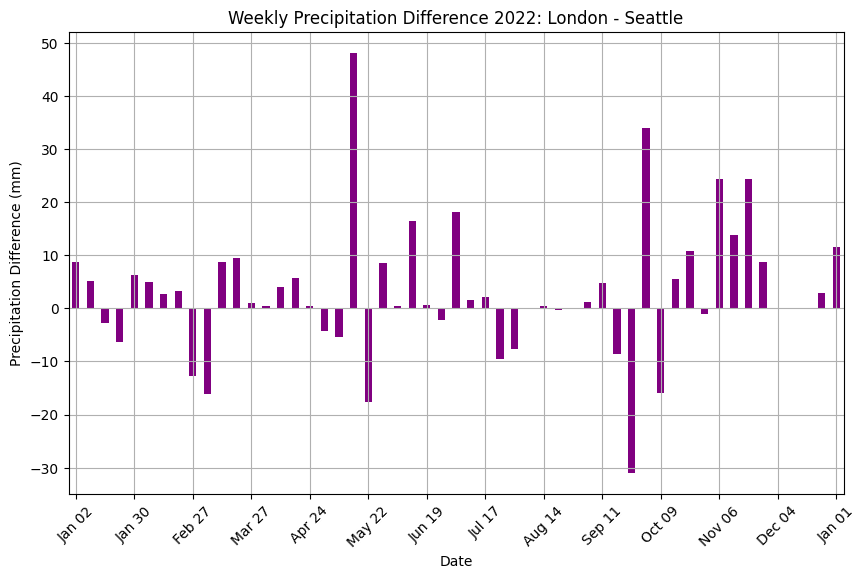

In [48]:
# Plot the precipitation difference
ax = combined_precip['Precipitation Difference'].plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Weekly Precipitation Difference 2022: London - Seattle')
plt.xlabel('Date')
plt.ylabel('Precipitation Difference (mm)')

# Show every 4th label and use abbreviated month and day
xticks = range(0, len(combined_precip.index), 4)
labels = combined_precip.index[::4].strftime('%b %d')
plt.xticks(ticks=xticks, labels=labels, rotation=45)

plt.grid(True)
plt.show()

## Student Summary
### Objective: Compare the total weekly rainfall between London and Seattle over a full year.
### Methods:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: 
    - Plot the weekly total precipitation for both cities on the same bar graph.
    - Plot the weekly difference between cities (London - Seattle) on a bar graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

### Results:
On average, London received slightly more weekly rainfall than Seattle (mean difference: ~3 mm; median: ~1 mm).
However, there were several weeks when Seattle had much higher rainfall than London, with the largest weekly difference reaching approximately 31 mm.